In [1]:
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be re

In [3]:
data = np.genfromtxt('packet_response.txt')
print(data.shape)

(600,)


In [4]:
np.histogram(data, bins=40)

(array([114,  75,  55,  22,  18,  19,  13,  11,  16,   7,  20,  15,  11,
         14,  18,  16,  17,  11,  18,  10,  13,  12,  19,  12,  12,  10,
         12,   8,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1], dtype=int64),
 array([0.203 , 0.3584, 0.5138, 0.6692, 0.8246, 0.98  , 1.1354, 1.2908,
        1.4462, 1.6016, 1.757 , 1.9124, 2.0678, 2.2232, 2.3786, 2.534 ,
        2.6894, 2.8448, 3.0002, 3.1556, 3.311 , 3.4664, 3.6218, 3.7772,
        3.9326, 4.088 , 4.2434, 4.3988, 4.5542, 4.7096, 4.865 , 5.0204,
        5.1758, 5.3312, 5.4866, 5.642 , 5.7974, 5.9528, 6.1082, 6.2636,
        6.419 ]))

In [5]:
hg_count, hg_bins = np.histogram(data, bins=40)

In [6]:
print(hg_count.shape, hg_bins.shape)

(40,) (41,)


In [7]:
x = np.arange(1, hg_count.size+1)

In [8]:
fit = np.polyfit(np.log(x), hg_count, 1)
print(fit)

[-20.98085004  72.86551996]


In [9]:
x_fit = np.arange(1, hg_count.shape[0]+1, 0.1)
y_fit = fit[0]*np.log(x_fit) + fit[1]

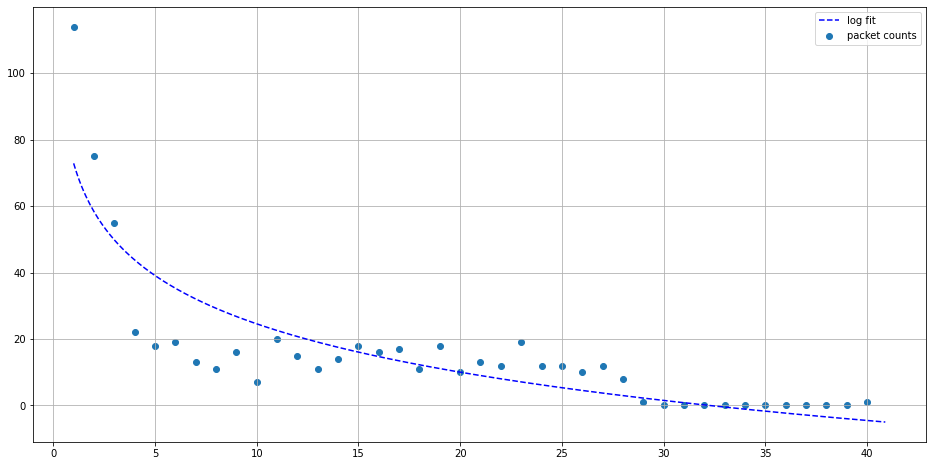

In [10]:
plt.figure(figsize=(16,8))
plt.scatter(x, hg_count, label='packet counts')
plt.plot(x_fit, y_fit, 'b--', label='log fit')
plt.grid()
plt.legend()
plt.show()

### Zero Gauss Signal Offset

In [11]:
from calibration import get_xyz_calib_values

In [12]:
zg_offset = np.genfromtxt('zg_offset.txt')

In [13]:
calib_coeffs = get_xyz_calib_values('Hall probe 444-20')

In [14]:
labels = ['Calibration X', 'Calibration Y', 'Calibration Z']
for i, j in enumerate(calib_coeffs):
    print(labels[i])
    print(j)

Calibration X
[[-0.098      0.0000211  0.0041    -0.00133    0.704      0.39
  57.       ]
 [ 0.         0.         0.         0.         1.         0.
   1.       ]
 [-0.067      0.0001931  0.0033388 -0.00052    0.988583   0.39
  57.       ]]
Calibration Y
[[ 0.059      0.0000358  0.0017     0.         0.703      0.39
  57.       ]
 [ 0.         0.         0.         0.         1.         0.
   1.       ]
 [ 0.051      0.000187   0.0008482  0.         0.993285   0.39
  57.       ]]
Calibration Z
[[-0.283      0.000034   0.0039    -0.00095    0.709      0.39
  57.       ]
 [ 0.         0.         0.         0.         1.         0.
   1.       ]
 [-0.049      0.0002063  0.003      0.         0.997      0.39
  57.       ]]


In [15]:
print(zg_offset)

[ 0.06426112 -0.05237014  0.05077035]


In [16]:
calib_coeffs[0, 2, 0]

-0.067

In [17]:
calib_coeffs[:, 2, 0]

array([-0.067,  0.051, -0.049])

In [18]:
calib_coeffs[:, 2, 0] = -zg_offset

In [19]:
calib_coeffs[:, 2, 0]

array([-0.06426112,  0.05237014, -0.05077035])

In [20]:
import os

In [21]:
if os.path.isfile('zg_calib_coeffs.txt'):
    os.remove('zg_calib_coeffs.txt')
with open('zg_calib_coeffs.txt', 'a') as file:
    for i in calib_coeffs:
        np.savetxt(file, i, fmt='%.6f')

In [22]:
np.save('zg_calib_coeffs.npy', calib_coeffs, allow_pickle=False)

In [23]:
pt = np.genfromtxt('packet_times.txt')
print(pt.shape)

(300, 2)


In [24]:
from scipy.stats import gmean, gstd

In [25]:
print(gmean(pt, axis=0))
print(gstd(pt, axis=0, ddof=1))

[0.95549242 0.9702711 ]
[2.89289401 2.88698398]


In [26]:
gsig = np.exp(np.sqrt(np.sum(np.log(pt[:, 0]/gmean(pt[:, 0]))**2)/(pt.shape[0]-1)))
print(gsig)

2.892894011475198
